In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(1)
m = 200
n= 100
X = np.random.normal(size=(m,n))
beta = np.ones((n,))
eps = np.random.normal(size=(m,))
y = X@beta + eps

In [3]:
def grad_F(theta):
    return 2*(X.T@X@theta - X.T@y)/m
def F(theta):
    return np.linalg.norm(X@theta - y)**2 / m
XTX = X.T@X
def partial(j,theta):
    return (2/n) * (XTX[j,:] @ theta - X.T[j,:] @ y)

In [4]:
theta_hat = np.linalg.inv(XTX)@X.T@y

Accelerated randomized coordinate descent defined by algorithm one in the paper at this link https://mitsloan.mit.edu/shared/ods/documents?PublicationDocumentID=4768

pre computing $L_i$ and $a^k$  ($a^k$ is my substitute for $\theta_k$ in the paper's definition becuase here the iterates are called $\theta$)

In [5]:
L = np.zeros(shape=(n,))
for i in range(n):
    mat = np.outer(X[i,:], X[i,:])
    eigs = np.linalg.eig(mat).eigenvalues
    L[i] = np.max(np.real(eigs))


In [26]:
n_iter = 40000
a = np.ones(shape=(n_iter,))
for i in range(1,n_iter):
    b = 1/a[i-1]**2
    a[i] = (-1 + (1 + 4*(b))**0.5)/(2*b)

Here  $\theta^k = (1 - a_k)p^k + a_kq^k$

ARCD

Text(0, 0.5, 'Log Error')

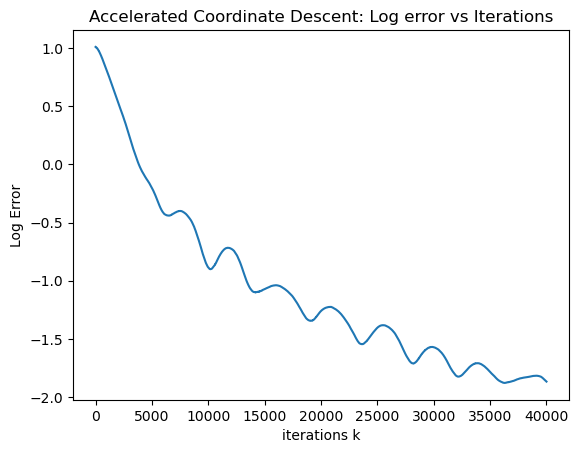

In [27]:

theta_k = np.zeros(shape=(n_iter,n))
p_k = np.zeros(shape=(n_iter,n))
q_k = np.zeros(shape=(n_iter,n))

errors_k = np.zeros(shape=(n_iter))
errors_k[0] = np.linalg.norm(theta_hat)



for i in range(1,n_iter):
    # random coordinate choice , j_k1 = j_k2
    j = np.random.randint(n)
    ej = np.zeros(shape=(100,))
    ej[j] = 1

    p_k[i] = theta_k[i-1] - (1/L[j])*partial(j,theta_k[i-1])*ej
    q_k[i] = q_k[i-1] - (1/(n*L[j]*a[i-1]))*partial(j,theta_k[i-1])*ej
    theta_k[i] = (1 - a[i]) * p_k[i] + a[i]*q_k[i]

    errors_k[i] = np.linalg.norm(theta_hat - theta_k[i])
    
plt.plot(np.log10(errors_k))
plt.title("Accelerated Coordinate Descent: Log error vs Iterations")
plt.xlabel("iterations k")
plt.ylabel("Log Error")


In [14]:
ub_E = 2*n**2 / (n_iter + 1)**2 * (L*theta_hat @ theta_hat)
ub_E

0.12947018146471517

In [15]:
F(theta_k[n_iter - 1, :]) - F(theta_hat)

-2.220446049250313e-16

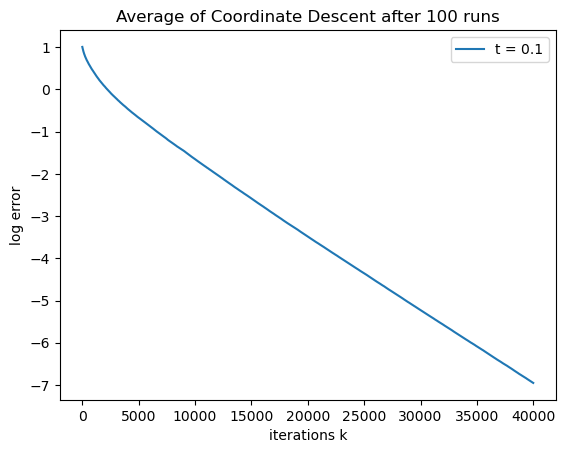

In [45]:
n_iter = 40000
plt.figure()
eigs = np.linalg.eig(XTX)
runs = 10
#t = n/np.max(np.real(eigs.eigenvalues))
t = 0.1


errors_k = np.zeros(shape=(n_iter,))
for r in range(runs):
    theta_k = np.zeros(shape=(n_iter + 1,n))
    for i in range(1, n_iter + 1):
        j = np.random.randint(n)
        ej = np.zeros(shape=(100,))
        ej[j] = 1
        theta_k[i,:] = theta_k[i-1] - t*ej*partial(j,theta_k[i-1])
        errors_k[i-1] = errors_k[i-1] + np.linalg.norm(theta_hat - theta_k[i])
    
    
plt.plot(np.log10(errors_k/runs), label="t = 0.1")
plt.title(f"Average of Coordinate Descent after 100 runs")
plt.ylabel("log error")
plt.xlabel("iterations k")
plt.legend()

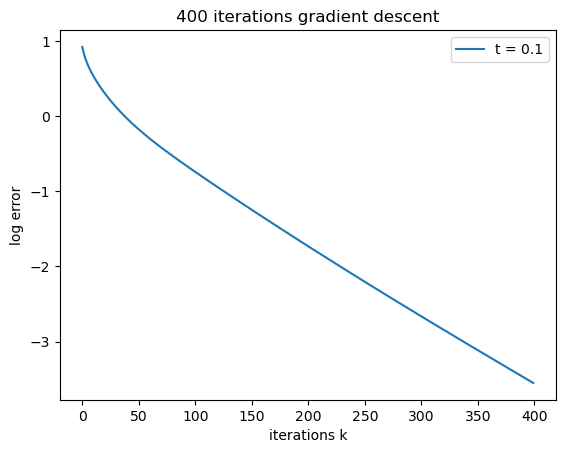

In [44]:
n_iter = 400
plt.figure()
eigs = np.linalg.eig(XTX)

#t = n/np.max(np.real(eigs.eigenvalues))
t = 0.1

theta_k = np.zeros(shape=(n_iter + 1,n))
errors_k = np.zeros(shape=(n_iter,))
for i in range(1, n_iter + 1):
    theta_k[i,:] = theta_k[i-1] - t*grad_F(theta_k[i-1])
    errors_k[i-1] = np.linalg.norm(theta_hat - theta_k[i])
    
    
plt.plot(np.log10(errors_k), label="t = 0.1")
plt.title(f"{n_iter} iterations gradient descent")
plt.ylabel("log error")
plt.xlabel("iterations k")
plt.legend()

Performing 100 runs of ARCD

0
10
20
30
40
50
60
70
80
90


Text(0, 0.5, 'Log Error')

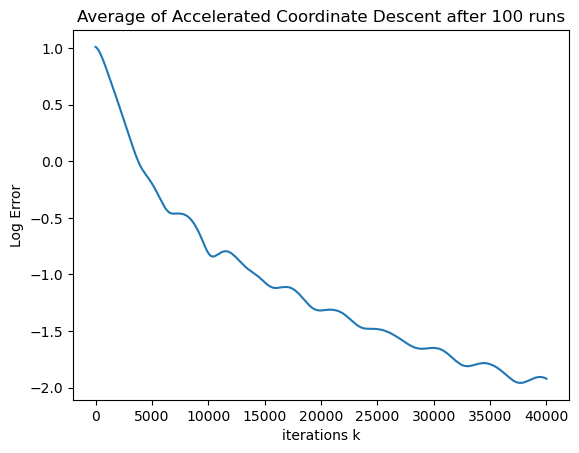

In [41]:
runs = 100
n_iter = 40000
theta_k = np.zeros(shape=(n_iter,n,runs))


errors_k = np.zeros(shape=(n_iter))
errors_k[0] = np.linalg.norm(theta_hat) * runs


for r in range(runs):
    if r%10 == 0:
        print(r)
    p_k = np.zeros(shape=(n_iter,n))
    q_k = np.zeros(shape=(n_iter,n))
    for i in range(1,n_iter):
        # random coordinate choice , j_k1 = j_k2
        j = np.random.randint(n)
        ej = np.zeros(shape=(100,))
        ej[j] = 1

        p_k[i] = theta_k[i-1,:,r] - (1/L[j])*partial(j,theta_k[i-1,:,r])*ej
        q_k[i] = q_k[i-1] - (1/(n*L[j]*a[i-1]))*partial(j,theta_k[i-1,:,r])*ej
        theta_k[i,:,r] = (1 - a[i]) * p_k[i] + a[i]*q_k[i]

        errors_k[i] =errors_k[i] + np.linalg.norm(theta_hat - theta_k[i,:,r])
    
plt.plot(np.log10(errors_k/runs))
plt.title("Average of Accelerated Coordinate Descent after 100 runs")
plt.xlabel("iterations k")
plt.ylabel("Log Error")


Calculating the upperbound on Expected error

In [34]:
ub_E = 2*n**2 / (n_iter + 1)**2 * (L*theta_hat @ theta_hat)
ub_E

0.12947018146471517

Calculating the average error after final iteration

In [36]:
end_f = np.zeros(shape=(runs))
for r in range(runs):
    end_f[r] = F(theta_k[n_iter - 1,:,r])
end_err = end_f - F(theta_hat)

In [37]:
np.mean(end_err)

2.5478519964097223e-05